In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#01. 분류모델

# 목차

-  Project1. Load_digits: 손글씨 분류

-  Project2. Load_wine : 와인 분류

-  Project3. Load_breast_cancer : 유방암 진단

    - Step (1) 필요한 모듈 import하기

    - Step (2) 데이터 준비

    - Step (3) 데이터 이해하기

    - Step (4) train, test 데이터 분리

    -step (5) 다양한 모델로 학습


결론 : 모델 평가해 보기

회고

---

#01) Load_digits: 손글씨 분류

step(1) 모듈 import하기

Step (2) 데이터 준비

In [171]:
from sklearn.datasets import load_digits
digits = load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [172]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Step (3) 데이터 이해하기

In [173]:
#Feature Data 지정 
digits_data = digits.data
print(digits_data.shape)

(1797, 64)


In [174]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [175]:
#Label Data 지정 
digits_label = digits.target
print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [176]:
# Target Names 출력
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [177]:
# 데이터 Drecribe 
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

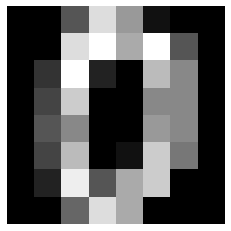

In [178]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

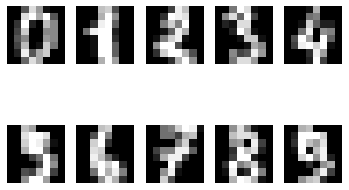

In [179]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

Step (4) train, test 데이터 분리

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


step (5) 다양한 모델로 학습

* 1)Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [182]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
#y_pred

In [183]:
#y_test

In [184]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.81      0.79      0.80        28
           2       0.87      0.82      0.84        33
           3       0.79      0.91      0.85        34
           4       0.81      0.85      0.83        46
           5       0.91      0.83      0.87        47
           6       0.94      0.94      0.94        35
           7       0.81      0.85      0.83        34
           8       0.85      0.77      0.81        30
           9       0.80      0.88      0.83        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



In [185]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8527777777777777

* 2)Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [187]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9722222222222222

* 3)SVM : Support Vector Machine

In [188]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [189]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9861111111111112

* 4)SGD Classifier

In [190]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.76      1.00      0.86        28
           2       1.00      0.94      0.97        33
           3       0.92      0.97      0.94        34
           4       1.00      0.96      0.98        46
           5       0.92      0.98      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.93      0.87      0.90        30
           9       0.97      0.80      0.88        40

    accuracy                           0.94       360
   macro avg       0.95      0.95      0.94       360
weighted avg       0.95      0.94      0.94       360



In [191]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9444444444444444

* 5)Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 10 ** 4) ## max_iter = 학습 횟수 늘려주세요 
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [193]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9722222222222222

#02)Load_wine : 와인 분류

step(1) 모듈 import하기

In [141]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

step(2) 데이터 준비

In [142]:
wine = load_wine()
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


step(3)  데이터 이해하기

In [143]:
#wine.keys()
#print(wine.DESCR)

In [144]:
# Feature Names 출력해 보기
wine.feature_names
#len(wine.feature_names)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [145]:
# Target Names 출력해 보기
wine.target_names
#len(wine.target_names)

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [146]:
# Feature Data 지정하기
wine_data = wine.data
print(wine_data.shape)

(178, 13)


In [147]:
wine_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [148]:
# Label Data 지정하기
wine_label = wine.target
print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [149]:
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [150]:
wine_df["label"] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


step (4) train-test data 분리

In [151]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = wine_label)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


In [152]:
X_train.shape, y_train.shape

((142, 13), (142,))

In [153]:
X_test.shape, y_test.shape

((36, 13), (36,))

In [154]:
y_train, y_test

(array([0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2,
        0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1,
        2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2,
        1, 2, 1, 1, 1, 2, 1, 0, 2, 2]),
 array([0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2]))

step (5) 다양한 모델 학습시키기

* 1) Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)

classifier


DecisionTreeClassifier(random_state=32)

In [156]:
y_pred = decision_tree.predict(X_test)
y_pred

array([0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2])

In [157]:
y_test

array([0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2])

In [158]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9444444444444444

In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



* 2)Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [161]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

* 3)SVM : Support Vector Machine

In [162]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [163]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.61      1.00      0.76        14
           2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.51      0.64      0.56        36
weighted avg       0.54      0.69      0.60        36



In [164]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6944444444444444

* 4)SGD Classifier

In [165]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [166]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       1.00      0.50      0.67        14
           2       0.53      1.00      0.69        10

    accuracy                           0.75        36
   macro avg       0.84      0.78      0.76        36
weighted avg       0.87      0.75      0.75        36



In [167]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

* 5)Logistic Regression 

In [168]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 10 ** 4)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [169]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9444444444444444

#03)Load_breast_cancer : 유방암 진단

Step (1) 필요한 모듈 import하기

In [115]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Step (2) 데이터 준비

In [116]:
cancer = load_breast_cancer()
print(dir(cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


Step (3) 데이터 이해하기

In [117]:
cancer.target_names 
# malignant(악성), benign(양성)

array(['malignant', 'benign'], dtype='<U9')

In [118]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [119]:
#print(cancer.DESCR)

In [120]:
cancer_data = cancer.data
print(cancer_data.shape)

(569, 30)


In [121]:
cancer_label = cancer.target

In [122]:
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [123]:
cancer_df["label"] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Step (4) train, test 데이터 분리

In [124]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


step (5) 다양한 모델로 학습

* 1) Decision Tree


In [125]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [126]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9473684210526315

In [127]:
y_pred = decision_tree.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [128]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

* 2) Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [130]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9649122807017544

* 3) SVM 

In [131]:
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [132]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9473684210526315

* 4) SDG Classifier

In [133]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [134]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9649122807017544

* 5) Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 10 ** 4)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [136]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.956140350877193

# 결론 : 모델 평가해 보기

1.Precision(정밀도)같은경우에는 Negative요소를 고려하지않는 수치이다. 즉, "분류"가 잘되었는지만 고려한다.
따라서 Precision은 예측모델이 Negative요소로 잘못 분류되도 상관이 없을때 주로 사용하는 측정값이다.

2.반대로 Recall(재현률) 같은경우에는 Negative요소를 고려하는 수치이다. 즉, "잘못 분류"가 되었는지도 함께 고려한 값이다.
Recall은 Negative요소를 고려하기때문에 특정 클래스가 예측모델이 Negative로 잘못분류되면 안되는 상황에서 주로 사용된다.

3.f1-score은 Precision(정밀도)과 Recall(재현률)의 조화평균이다. 두 수치가 모두를 고려한  모델을 고려하고 싶다면 f1-score를 사용한다. 

- **Project1. Load_digits: 손글씨 분류**

 **SVM : Support Vector Machine**모델이  f1-score가 가장 높아 최적의 모델로 선정 되었다. 
 손글씨 분류 모델의 경우 Negative요소로 잘못 분류되더라도 리스크가 그다지 크지 않기에 precision 과 recall의 조화 평균인 f1-score를 평가 기준으로 삼았다. 



- **Project2. Load_wine : 와인 분류**

 **Decision Tree**모델과 **Logistic Regression** 모델이 세가지 종류의 와인 타겟의 지표의 수치가 고르게 분포되어 있고 그중에서 높은 수치를 보여 선정했다. 
 또, Random Forest 모델의 정확도는 모든면에서 1이 나왔지만 과적합의 문제가 있어 평가에서 제외했다.
 나머지 모델들은 한 타켓의 정밀도와 재현율이 현저하게 낮아서 그 분포가 고르지 못하기에 제외했다. 
 와인 분류에 역시 손글씨 분류와 마찬가지의 이유로 f1-score를 기준했다. 


- **Project3. Load_breast_cancer : 유방암 진단**

  유방암 진단은 FN( 음성이라고 판정했지만 양성인 경우 ) 암에 걸렸는데 암이 아니라고 판단하는것은 치명적인 문제가 따르기에 Negative 잘못 분류 되면 안되는 경우에 속한다. 그래서 Precision 보다 Recall을 더 중요한 지표로 고려하였다.  **Decision Tree, Random Forest, SDG Classifier** 세가지 모델 다 같은 높은 recall 수치를 보였기에 유방암 진단 모델에 최적의 모델로 선정했다.

# 회고



### - 이번 프로젝트에서 **어려웠던 점**.

모델을 만들어서 실행하는것은 차근차근 코드를 따라 진행하면 되어서 비교적 문제가 없었다. 하지만 이진분류 평가지표를 정확하게 이해하고 이를 이용해 모델을 평가하는 기준을 세우는 것이 어려웠다. 


### - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.

{알아낸점}

<​macro avg, weighted avg, micro avg>

* micro avg: 단순 평균을 이용한 계산방식. 만약에 데이터가 ***불균형한 데이터일 경우에는 부정확할수가 있다.***
* macro avg: 라벨 별 각 합의 평균
* weighted avg: 불균형한 데이터일 경우에 보는 수치값. 라벨의 비중에 따라서 ***가중치를 곱해준다***



< 혼동행렬>
 
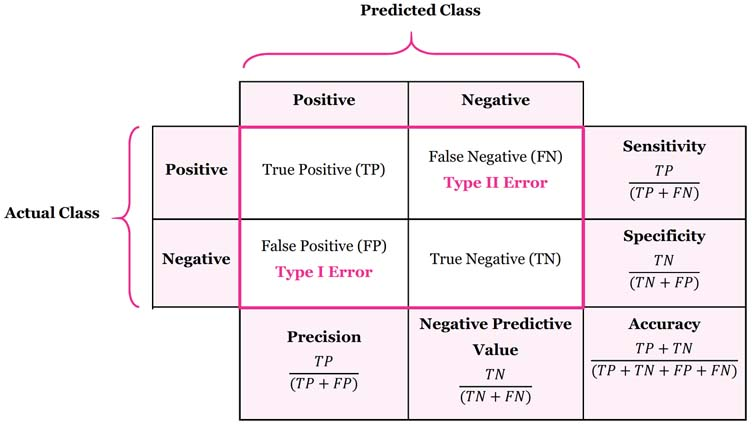



1. 정확도 (accuracy) :
예측이 현실에 부합할 확률이다. 예측 결과 전체를 모두 모아서 분모에 넣고, 참긍정이든 참부정이든 제대로 예측하는 데 성공한 빈도가 전체 중의 얼마를 차지하는지 0~1 사이 값으로 살펴본다. 정확도가 높다는 것은 곧 예측이 제대로 적중한 경우가 많다는 의미가 되며, 정확도 높은 예측 알고리즘은 활용 가능성이 높다고 인정된다.


2. 정밀도 (precision): 
‘예측 결과’가 긍정적일 때 현실도 실제로 긍정일 확률이다. 여기서는 예측 결과가 긍정적인 경우에만 관심을 갖고, 예측 결과가 부정적일 때 이를 얼마나 신뢰해야 할지에 대한 정보는 제공하지 않는다. 

3. 민감도 (sensitivity)= 재현율(recall) : 
‘현실’이 실제로 긍정일 때 예측 결과도 긍정적일 확률이다. 현실이 긍정인 경우에만 관심을 갖고, 현실이 부정일 때 예측이 어떻게 이루어지는지에 대한 정보는 제공하지 않는다. 

4. 특이도 (speciality) :
‘현실’이 실제로 부정일 때 예측 결과도 부정적일 확률이다. 여기서는 민감도와는 반대로 현실이 부정인 경우에만 관심을 갖는다. 역시 민감도와는 반대로, 특이도는 현실이 긍정일 때의 평가 정보는 제공하지 않는다.

cf) f1-score : precision 과 recall의 조화평균이다.
precision 과 recall 모두 좋은 모델을 고려하고 싶다면 f1-score 를 고려하면 된다.

출처 : https://namu.wiki/w/혼동행렬

 


### - 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.

>#### **루브릭**
>|번호|평가문항|상세기준|
>|:---:|---|---|
>|1|1. 3가지 데이터셋의 구성이 합리적으로 진행되었다.|feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개되었다.|
>|2|3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였다.| 모델학습 및 테스트가 정상적으로 수행되었다. |
>|3|3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었다.|평가지표 선택 및 이유 설명이 타당하다.|

* Logistic Regression :
max_iter 값을 설정해서 warning을 해결한다. 

  max_iter : 
 반복(이터레이션, iteration)은 몇 개의 배치(batch)를 사용할 것인지를 의미한다.
max_iter는 기계 학습(머신 러닝)의 훈련(training) 과정에서 반복을 몇 번 할 것인지를 정해준다.
일단 수렴(Convergence)하게 되면 횟수를 늘려도 성능이 거의 달라지지 않는다. 


* overfitting
train_test_split 과정에서 (stratify=y_data 옵션)을 설정하여 와인 분류에서 두가지 모델이 과적합인 것을 하나로 줄였다.

  계층적 데이터 추출 옵션 
: 여러 층으로 분할후 각 층별로 렌덤 데이터 추출, 원래 데이터의 분포와 유사하게 데이터 추출.

  테스트 세트의 갯수가 훈련 세트에 비해 터무니 없이 작을 때 샘플링 편향이 발생할 시 이를 방지하기 위해 train_test_split()함수 내에 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나누어준다.



​

클래스 비율에 맞게 데이터를 나누게 됨



### - **자기 다짐**

* 앞의 다섯가지 모델에 대해 자세히 공부해보기 
* Decision Tree 의사결정나무 : 지니계수, 앤트로피, 정보획득, 비용함수 개념에 대해 더 공부하기
* Confusion Matics **혼동행렬 개념 일상 사례** 적용해보기
* ROC 커브에 대해 알아보기


### - **참고** 

혼동행렬 :
https://jaeyung1001.tistory.com/252

https://m.blog.naver.com/soowon0109/222557267247

https://webnautes.tistory.com/1603

https://m.blog.naver.com/libertyforever/222299312058

https://bigdaheta.tistory.com/53

유튜브:
https://www.youtube.com/watch?v=Eyxynd-vDsQ